# 1. Data load and split

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

In [2]:
from src.data_split import load_data_and_config

df, cfg = load_data_and_config()

In [3]:
df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,num_baskets,total_spent,total_items,...,most_common_product_type,most_common_garment_group,most_common_colour_master,most_common_department,most_common_index_group,most_common_index,most_common_graph_appearance,most_common_prod_name,most_common_color_group,most_common_color_value
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,10,648.98303,21,...,Blazer,Jersey Fancy,Black,Suit,Ladieswear,Ladieswear,Solid,Mariette Blazer,Black,Dark
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,23,2601.93210,86,...,Bikini top,Swimwear,Blue,Swimwear,Ladieswear,Lingeries/Tights,Solid,Timeless Midrise Brief,Black,Dark
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,7,704.77966,18,...,Sweater,Blouses,Black,Blouse,Ladieswear,Ladieswear,Solid,Atlanta Push Body Harlow,Black,Dark
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,6,469.69492,13,...,Underwear body,Jersey Fancy,Black,Functional Lingerie,Ladieswear,Ladieswear,Solid,Jacket Slim,Black,Dark
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,16,3823.61000,120,...,Bra,"Under-, Nightwear",Black,Expressive Lingerie,Ladieswear,Lingeries/Tights,Solid,Croydon unitard,Black,Dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617318,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,ACTIVE,Regularly,32.0,f22bd5702242c63a4d40c169e9c45564b933fa5093ea80...,17,809.62714,32,...,Blouse,Jersey Fancy,Black,Jersey,Ladieswear,Ladieswear,Solid,VIOLET COLD SHOULDER,Black,Dark
617319,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,11,1292.35600,51,...,Underwear bottom,"Under-, Nightwear",Black,Swimwear,Ladieswear,Lingeries/Tights,Solid,New Girl Wide Side Tanga,Black,Dark
617320,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,19,1807.32200,84,...,T-shirt,Jersey Basic,Pink,Basic 1,Divided,Divided,Solid,Brit Baby Tee,Light Pink,Dusty Light
617321,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,19,788.93220,45,...,Trousers,Jersey Fancy,Black,Tops Fancy Jersey,Ladieswear,Divided,Solid,Cool tiebelt dressed,Black,Dark


In [4]:
from src.data_split import split_data

X_tr, X_val, X_te, y_tr, y_val, y_te = split_data(df, cfg)

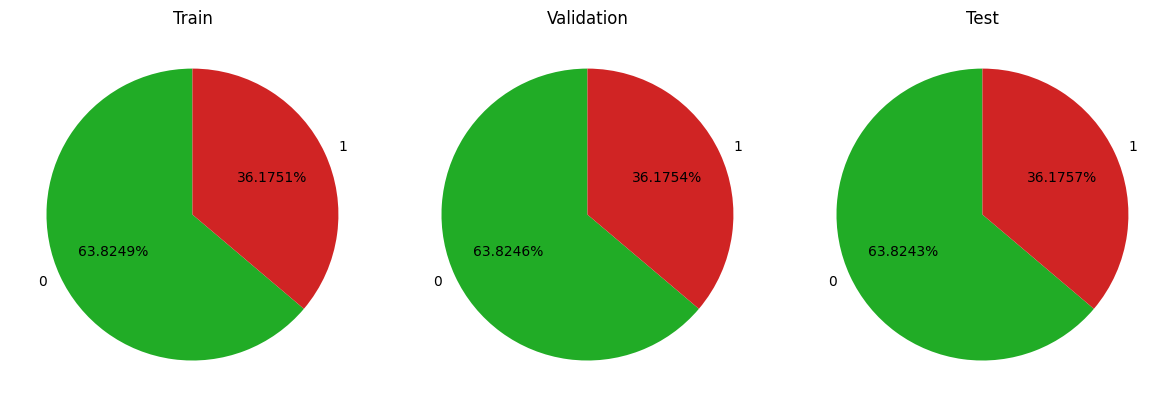

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

datasets = [("Train", y_tr), ("Validation", y_val), ("Test", y_te)]
colors = ["#21ac26", "#d02424"]

for ax, (title, y) in zip(axes, datasets):
    counts = y.value_counts(normalize=True).sort_index()
    labels = [str(cls) for cls in counts.index]
    ax.pie(
        counts,
        labels=labels,
        autopct="%.4f%%",
        startangle=90,
        colors=colors
    )
    ax.set_title(title)
plt.tight_layout()
plt.show()